Dealing with imbalanced data is a common challenge in classification problems. Both assigning class weights to the data and resampling techniques can be effective strategies to handle this issue, and the choice between the two often depends on the specific characteristics of your dataset and problem.

    Assigning Class Weights:
        Pros:
            Simple and straightforward to implement.
            It adjusts the algorithm to give higher importance to the minority class during training.
        Cons:
            Might not always work well, especially if the dataset is extremely imbalanced.

    Usage:
        Assign higher weights to the minority class and lower weights to the majority class when training the logistic regression model.
        Most machine learning libraries, including scikit-learn, provide a class_weight parameter that allows you to do this.

    Resampling Techniques:

        Oversampling:
            Pros:
                Helps balance the class distribution by creating more instances of the minority class.
            Cons:
                Risk of overfitting if not done carefully.

        Undersampling:
            Pros:
                Reduces the number of instances of the majority class, balancing the class distribution.
            Cons:
                Information loss due to discarding majority class instances.

    Usage:
        Random oversampling, SMOTE (Synthetic Minority Over-sampling Technique), random undersampling, etc.

In [1]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [2]:
def PolarsToPandas(df_polars):
    return df_polars.to_pandas()

In [3]:
df = pl.read_csv("train.csv")
df = PolarsToPandas(df)
df

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [4]:
df.isna().sum().any()

False

In [5]:
df.target.unique()

array([0, 1])

Class 0: 573518
Class 1: 21694
Proportion: 26.44 : 1


<Axes: title={'center': 'Count (target)'}, xlabel='target'>

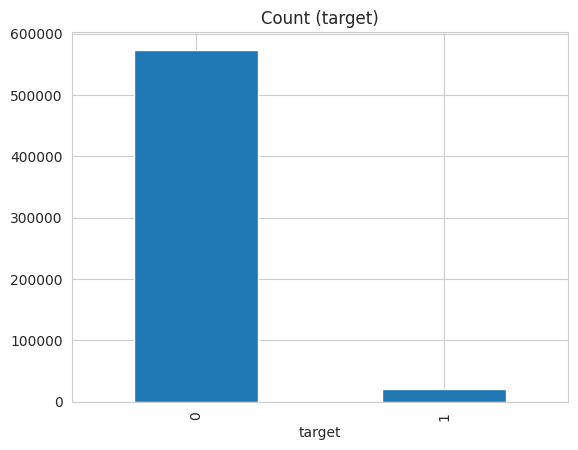

In [6]:
#target_0 = df.query('target == 0')
#target_1 = df.query('target == 1')
#print(len(target_0), len(target_1))

target_count = df.target.value_counts()

print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0]/target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

We can observe that these data are unbalanced; there are ~96% of class (target) 0 and ~ 4% of class 1.
As mentioned previously, there are two ways to deal with this problem: weighting the classes or resampling.


<h1> Resampling: under and over sampling <h1>

<h1> Random under-sampling <h1>

In [7]:
# Class count
count_class_0, count_class_1 = df.target.value_counts()

# Divide by class
df_class_0 = df.query('target == 0')
df_class_1 = df.query('target == 1')

Random under-sampling:
target
0    21694
1    21694
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='target'>

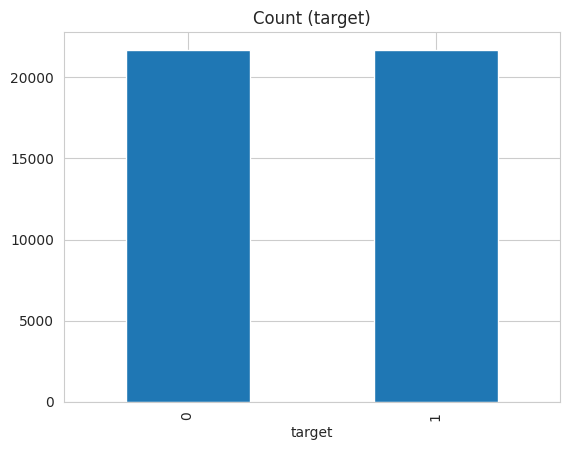

In [8]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)')

<h1> Random over-sampling <h1>

Random over-sampling:
target
0    573518
1    573518
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='target'>

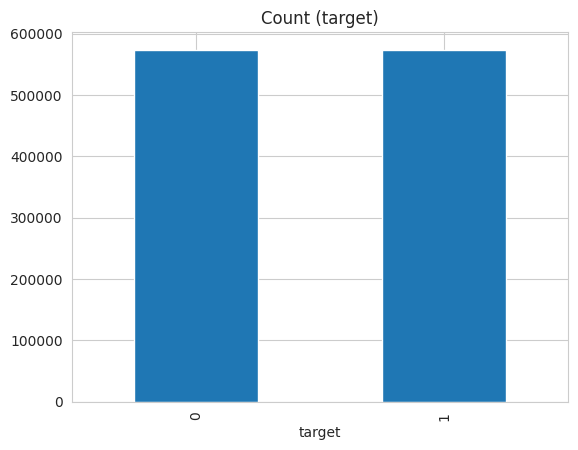

In [9]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)')

<h1> Random under-sampling and over-sampling with imbalanced-learn <h1> sklearn module

<Axes: title={'center': 'Count (target)'}, xlabel='target'>

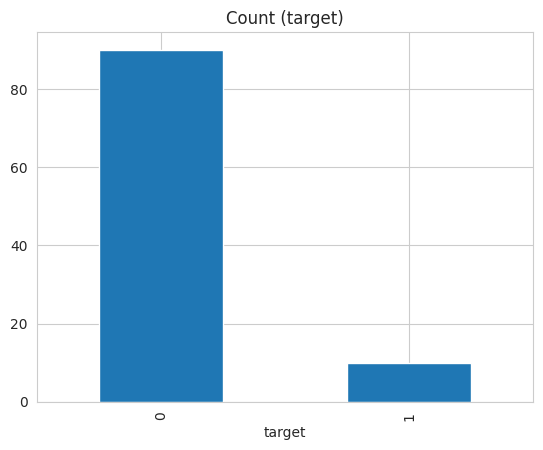

In [38]:
import imblearn
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=100, random_state=10,
                           )

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)')

In [39]:
def plot_2d_space(X, y, label='Classes'):
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

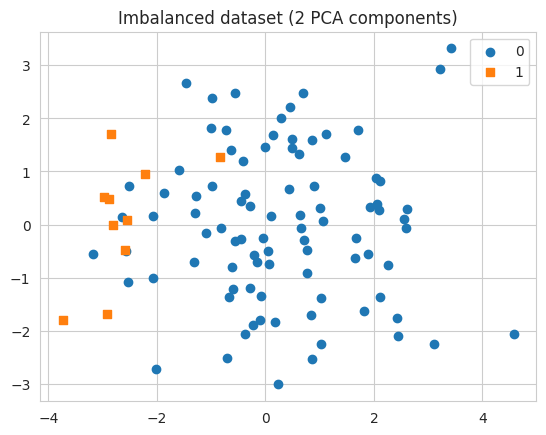

In [42]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

Removed indexes: [29 18 54 43 25 24 17 22 57 75  4  8  9 14 16 40 67 70 71 74]


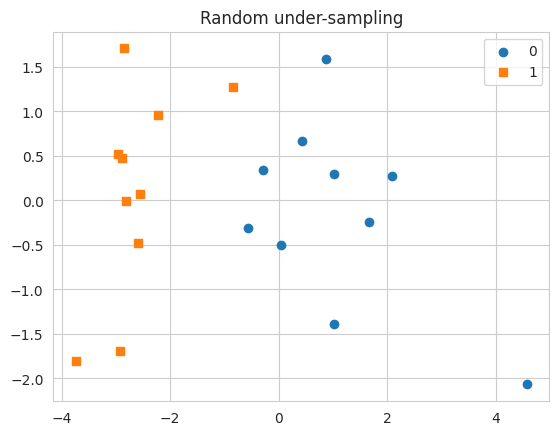

In [45]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

print('Removed indexes:', rus.sample_indices_)
plot_2d_space(X_rus, y_rus, 'Random under-sampling')

80 new random picked points


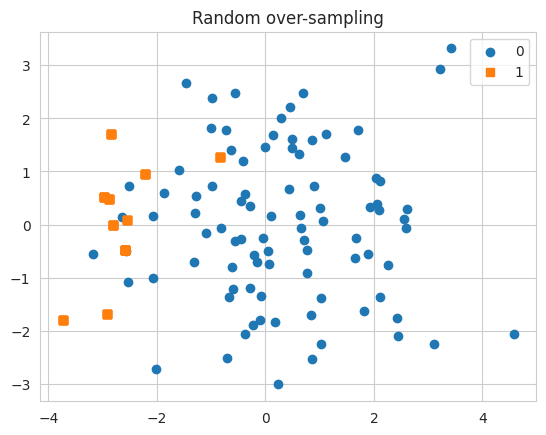

In [48]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [84]:
X_ros_ = pd.DataFrame(X_ros)
y_ros_ = pd.DataFrame(y_ros)
df_ros = pd.concat([X_ros_, y_ros_], axis=1)

<h1> Under-sampling: Tomek links <h1>

number of removed samples (of the majority sample): 4


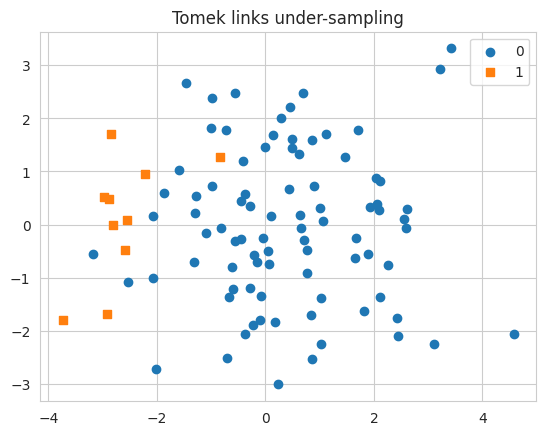

In [94]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority', n_jobs=-1)
X_tl, y_tl = tl.fit_resample(X, y)

print('number of removed samples (of the majority sample):', X.shape[0] - X_tl.shape[0])
plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

<h1> Under-sampling: Cluster Centroids <h1>

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In this example we preserve 10 elements from the majority class (0), and all minority class (1).

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples

/home/jordan/Desktop/Python_examples/scikit-learn/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


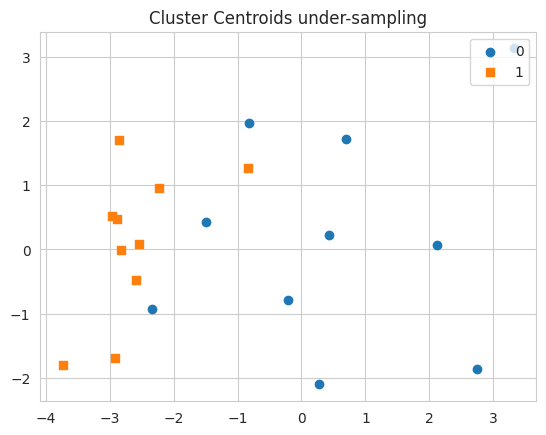

In [112]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy='auto')
X_cc, y_cc = cc.fit_resample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

<h1> Over-sampling: SMOTE <h1>

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

/home/jordan/Desktop/Python_examples/scikit-learn/venv/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:345: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


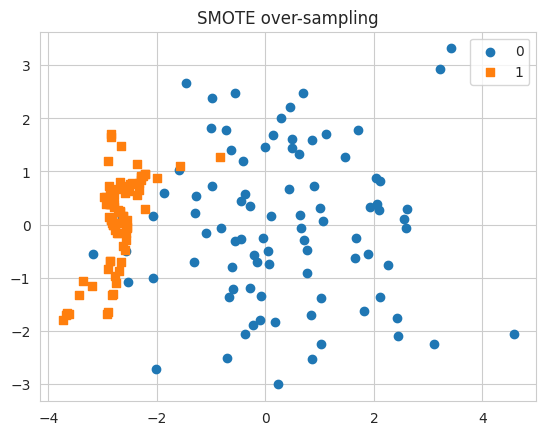

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')